In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('fake_reg.csv')

In [9]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


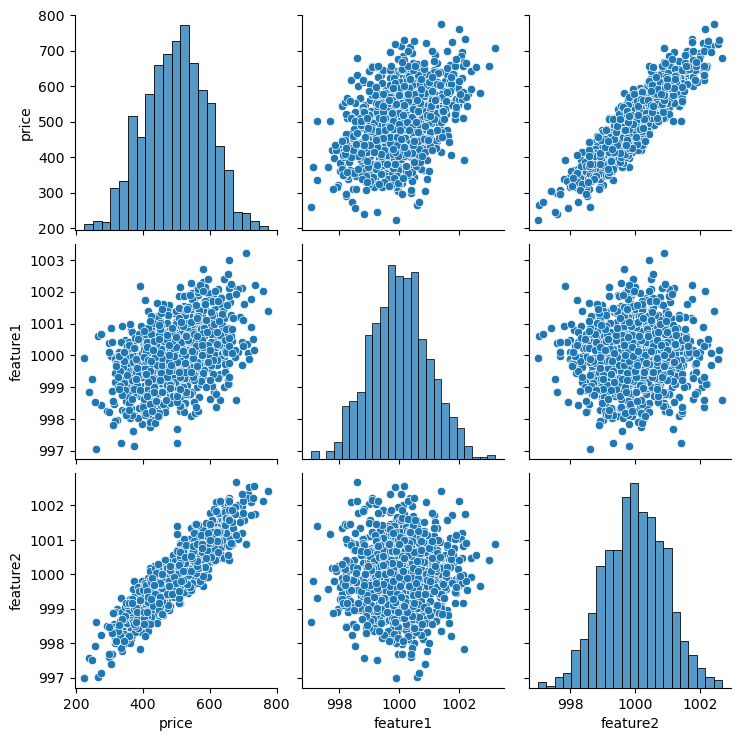

In [10]:
sns.pairplot(df)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['feature1','feature2']].values

In [13]:
y = df['price'].values

In [14]:
X


array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [21]:
X_train = scaler.transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [25]:
X_train.max()

np.float64(1.0)

In [26]:
X_train.min()

np.float64(0.0)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |
 |  Examples:
 |
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |
 |  # When using the delayed-build pattern (no 

In [30]:
model = Sequential([Dense(4,activation= 'relu')
                    ,Dense(2,activation = 'relu'),
                   Dense(1)])

In [32]:
model = Sequential()

model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))
model.add(Dense(4,activation= 'relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [33]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 256634.6094
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256433.5781 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256244.7969 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256035.9062 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255804.1562 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255562.9219 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255309.2812 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255029.0781 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254719.5000 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254377.0781 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253996.5000 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253578.0156 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253118.3281 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [35]:
pd.DataFrame(model.history.history)

,loss
0,256634.609375
1,256433.578125
2,256244.796875
3,256035.906250
4,255804.156250
...,...
245,24.133350
246,24.513622
247,24.064259
248,24.245611


In [36]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

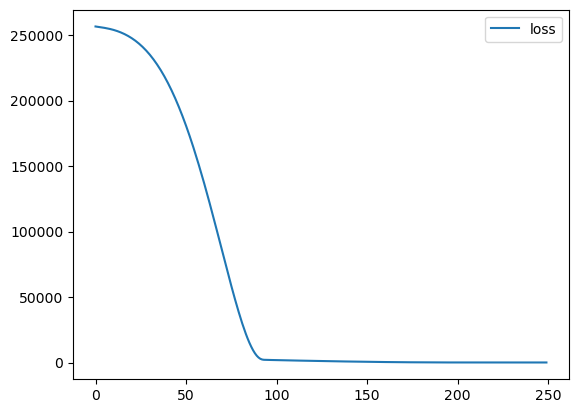

In [37]:
loss_df.plot()

In [38]:
model.evaluate(X_test,y_test,verbose= 0)

24.987363815307617

In [39]:
model.evaluate(X_train,y_train,verbose= 0)

24.142314910888672

In [40]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [41]:
test_predictions

array([[404.99643],
       [623.1888 ],
       [591.7828 ],
       [571.90356],
       [366.36148],
       [578.84436],
       [514.7576 ],
       [458.78925],
       [548.92804],
       [447.20227],
       [611.4374 ],
       [548.5869 ],
       [418.8051 ],
       [408.58212],
       [650.8546 ],
       [436.98978],
       [508.10876],
       [659.5953 ],
       [662.2328 ],
       [565.1909 ],
       [333.96756],
       [444.53204],
       [382.24988],
       [378.46756],
       [566.2615 ],
       [610.25964],
       [532.06836],
       [427.55856],
       [655.1018 ],
       [413.77512],
       [442.32254],
       [484.8138 ],
       [438.1105 ],
       [681.4952 ],
       [424.44144],
       [417.4017 ],
       [501.57907],
       [550.14185],
       [509.43457],
       [395.09332],
       [618.2359 ],
       [416.3242 ],
       [604.09894],
       [445.63647],
       [501.67123],
       [581.34607],
       [668.6163 ],
       [490.07663],
       [318.29614],
       [485.11588],


In [42]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [43]:
test_predictions

0      404.996429
1      623.188782
2      591.782776
3      571.903564
4      366.361481
          ...    
295    528.731506
296    515.054810
297    609.301270
298    416.645508
299    410.591766
Length: 300, dtype: float32

In [46]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [48]:
pred_df =pd.concat([pred_df,test_predictions],axis=1)

In [50]:
pred_df

,Test True Y,0
0,402.296319,404.996429
1,624.156198,623.188782
2,582.455066,591.782776
3,578.588606,571.903564
4,371.224104,366.361481
...,...,...
295,525.704657,528.731506
296,502.909473,515.054810
297,612.727910,609.301270
298,417.569725,416.645508


In [51]:
pred_df.columns = ['Test True Y','Model Predictions']

In [52]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.996429
1,624.156198,623.188782
2,582.455066,591.782776
3,578.588606,571.903564
4,371.224104,366.361481
...,...,...
295,525.704657,528.731506
296,502.909473,515.054810
297,612.727910,609.301270
298,417.569725,416.645508


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

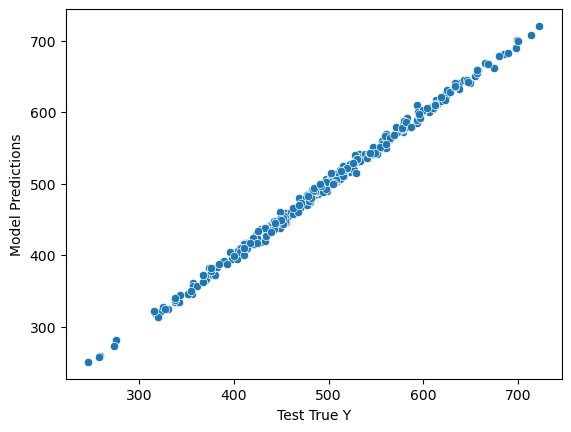

In [53]:
sns.scatterplot(x='Test True Y',y='Model Predictions', data = pred_df)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.001923381550212

In [56]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [57]:
new_gem = [[988,1000]]

In [58]:
new_gem = scaler.transform(new_gem)

In [59]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[54.807247]], dtype=float32)

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save('my_gem_model.h5')

In [62]:
later_model = load_model('my_gem_model.h5')

ValueError: Could not deserialize 'keras.metrics.mse' because it is not a KerasSaveable subclass